In [ ]:
%cd /content

# download the predictive coding repository
!git clone https://github.com/jgornet/predictive-coding-recovers-maps.git
%cd predictive-coding-recovers-maps/notebooks
!pip install -r ../requirements.txt

In [ ]:
from predictive_coding.analysis import *
from predictive_coding import PredictiveCoder, Autoencoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
import torch

model = PredictiveCoder(
    in_channels=3,
    out_channels=3,
    layers=[2, 2, 2, 2],
    seq_len=20,
)
model.load_state_dict(torch.load('../weights/predictive-coder-circle.ckpt'))
model = model.to('cuda:0')

In [41]:
images = torch.from_numpy(np.load('../weights/predictive-coder-circle-images.npy')).to('cuda:0')
latents = generate_latents(model, images).reshape(-1, 128, 8, 8)
positions = np.load('../weights/predictive-coder-circle-positions.npy').reshape(-1, 3)[:, :2]

In [42]:
latents = Latents(latents, positions, L=len(latents), offset=30, neighborhood=30, position_distance=circular_distance)

In [43]:
pc_regression = LogRegression(1, 1, latents, "Predictive coder", plt.cm.tab10(0))
pc_regression.train(latents)

/home/jamesgornet/Documents/navigation/predictive-coding-recovers-maps/notebooks/predictive_coding/analysis.py:374: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


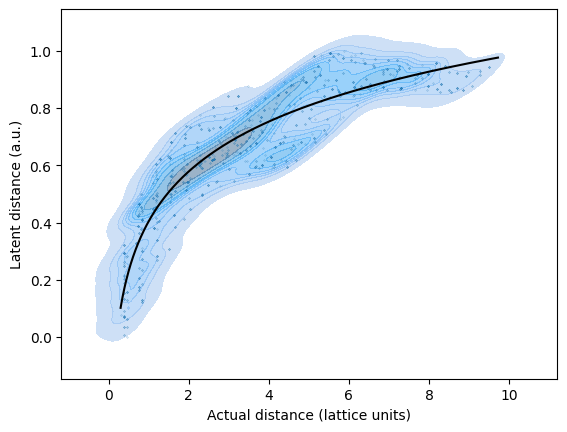

In [47]:
distribution_plot([pc_regression])
plt.show()

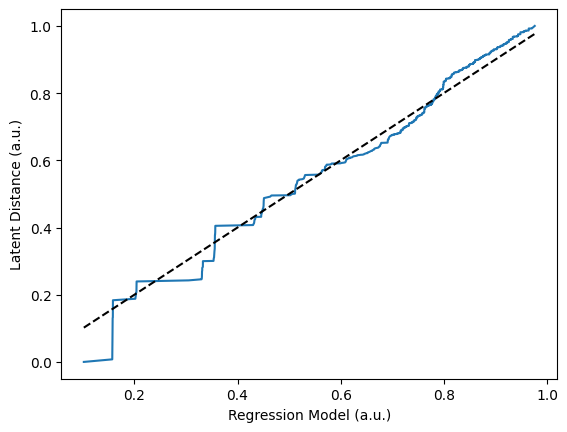

In [44]:
qq_plot([pc_regression])
plt.show()

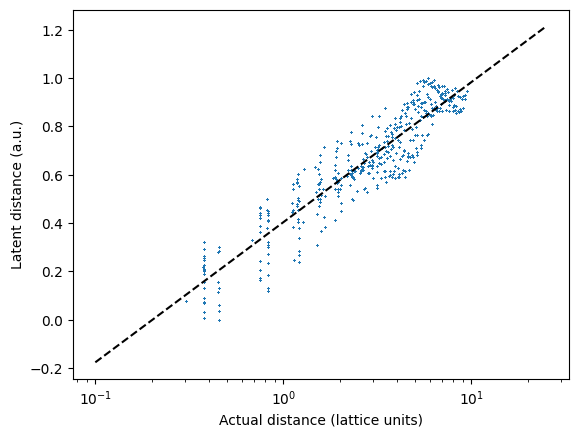

In [45]:
regression_plot([pc_regression])
plt.show()

In [48]:
position_decoder = PositionDecoder()
position_decoder.train(latents)

  0%|          | 0/8000 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

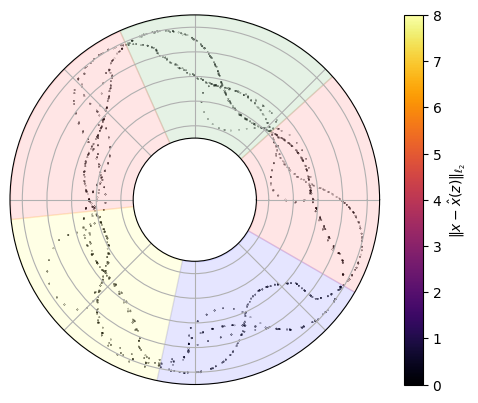

In [49]:
error_circle(position_decoder, latents)
plt.show()

In [33]:
import torch

model = Autoencoder(
    in_channels=3,
    out_channels=3,
    layers=[2, 2, 2, 2],
)
model.load_state_dict(torch.load('../weights/autoencoder-circle.ckpt'))
model = model.to('cuda:0')

In [36]:
images = torch.from_numpy(np.load('../weights/autoencoder-circle-images.npy')).to('cuda:0')
latents = generate_latents(model, images).reshape(-1, 128, 8, 8)
positions = np.load('../weights/autoencoder-circle-positions.npy')[:, :2]

In [37]:
latents = Latents(latents, positions[:, :2], L=len(latents), offset=20, neighborhood=30, position_distance=circular_distance)

In [21]:
ae_regression = LogRegression(1, 1, latents, "Auto-encoder", plt.cm.tab10(4))
ae_regression.train(latents)

/home/jamesgornet/Documents/navigation/predictive-coding-recovers-maps/notebooks/predictive_coding/analysis.py:374: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/jamesgornet/Documents/navigation/predictive-coding-recovers-maps/notebooks/predictive_coding/analysis.py:374: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


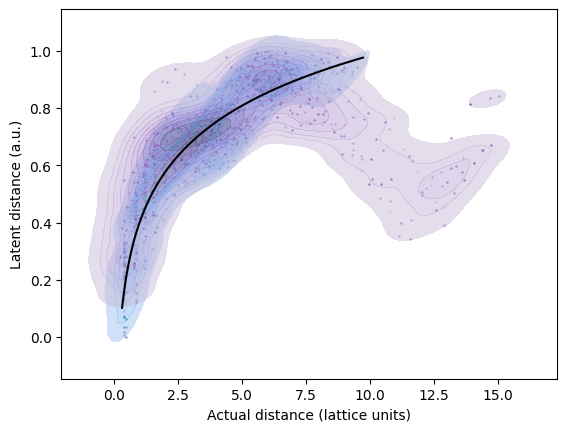

In [22]:
distribution_plot([pc_regression, ae_regression], density=0.15)
plt.show()

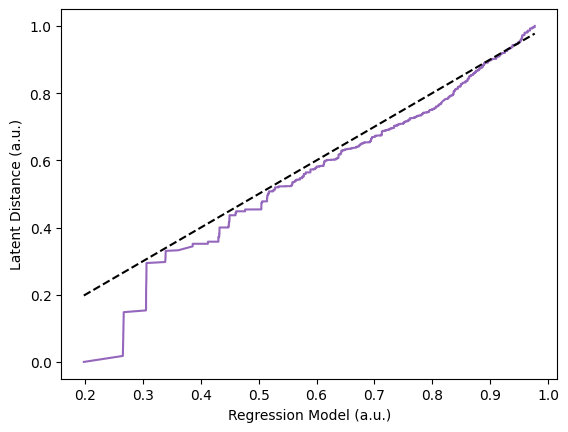

In [23]:
qq_plot([ae_regression])
plt.show()

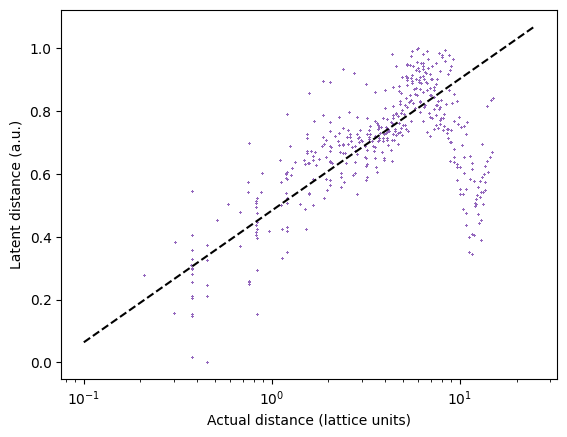

In [24]:
regression_plot([ae_regression])
plt.show()

In [25]:
position_decoder = PositionDecoder()
position_decoder.train(latents)

  0%|          | 0/8000 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

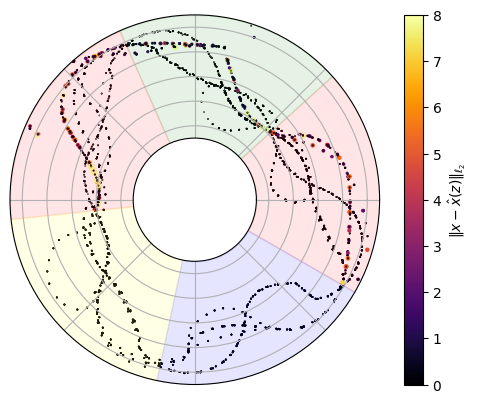

In [38]:
error_circle(position_decoder, latents)
plt.show()